<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [ ]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [ ]:
import pandas as pd

## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

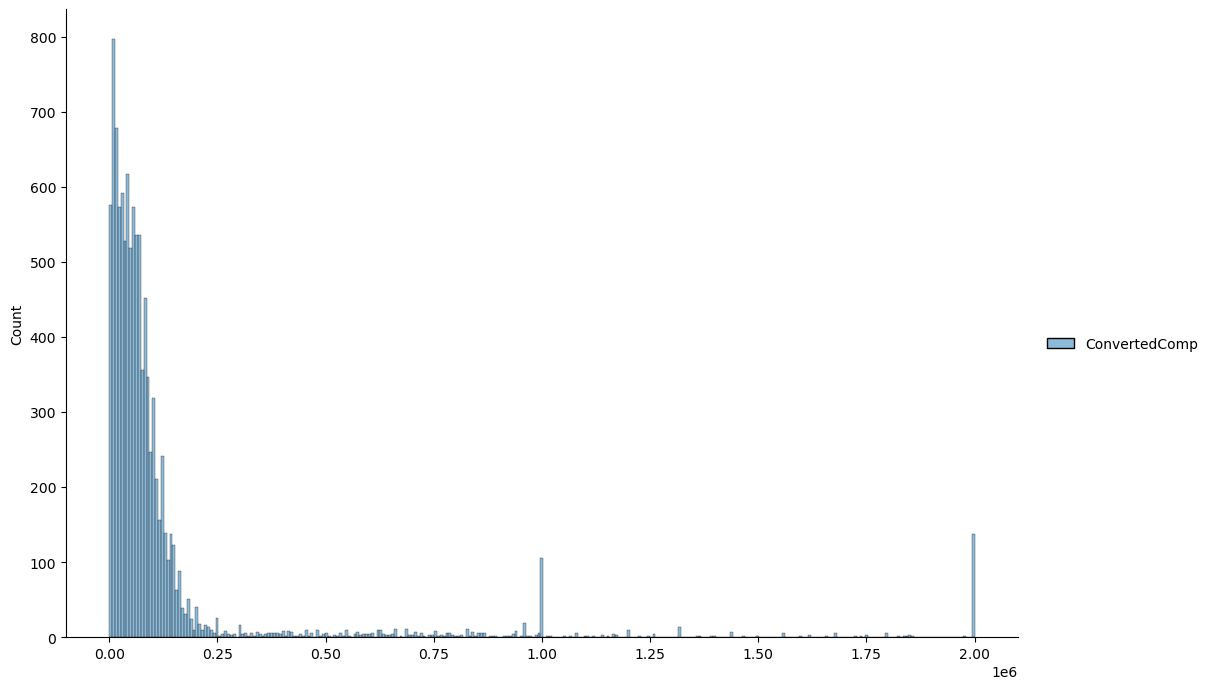

In [21]:
QUERY = """
SELECT ConvertedComp
FROM master

"""
df = pd.read_sql_query(QUERY,conn)

sns.displot(data=df, height=7, aspect = 1.5)

### Box Plots


Plot a box plot of `Age.`


        Age
0      22.0
1      23.0
2      28.0
3      26.0
4      29.0
...     ...
11393  36.0
11394  25.0
11395  34.0
11396  25.0
11397  30.0

[11398 rows x 1 columns]


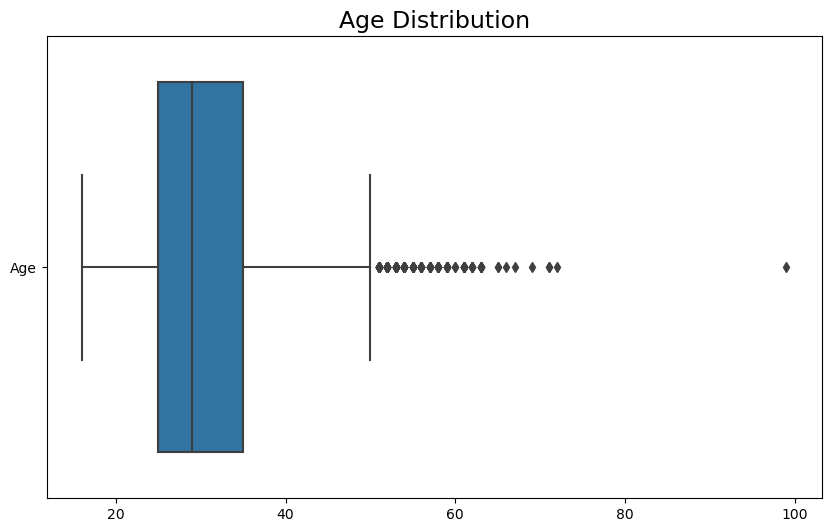

In [17]:
QUERY = """
SELECT Age
FROM master

"""
df = pd.read_sql_query(QUERY,conn)

print(df)

plt.figure(figsize=(10,6))
ax = sns.boxplot(data = df, orient = 'h')
ax.set_title('Age Distribution', size = 17)

plt.show()



## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


        Age  WorkWeekHrs
0      22.0         80.0
1      23.0         32.0
2      28.0         40.0
3      26.0         40.0
4      29.0         45.0
...     ...          ...
11393  36.0         40.0
11394  25.0         40.0
11395  34.0         40.0
11396  25.0         42.5
11397  30.0         80.0

[11398 rows x 2 columns]


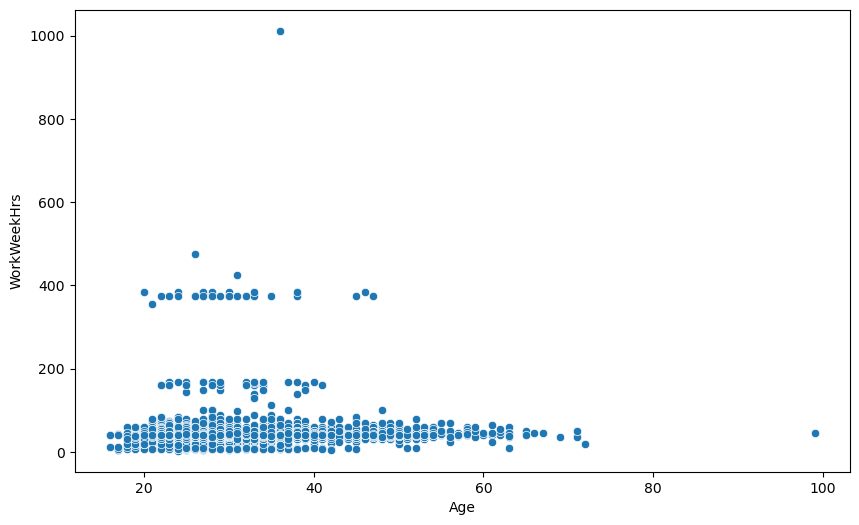

In [23]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master

"""
df = pd.read_sql_query(QUERY,conn)

print(df)

plt.figure(figsize=(10,6))

sns.scatterplot(data = df, x='Age', y='WorkWeekHrs')


plt.show()




### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


        Age  WorkWeekHrs  CodeRevHrs
0      22.0         80.0         NaN
1      23.0         32.0        12.0
2      28.0         40.0         5.0
3      26.0         40.0         NaN
4      29.0         45.0         5.0
...     ...          ...         ...
11393  36.0         40.0         NaN
11394  25.0         40.0         5.0
11395  34.0         40.0         5.0
11396  25.0         42.5         2.0
11397  30.0         80.0         1.0

[11398 rows x 3 columns]


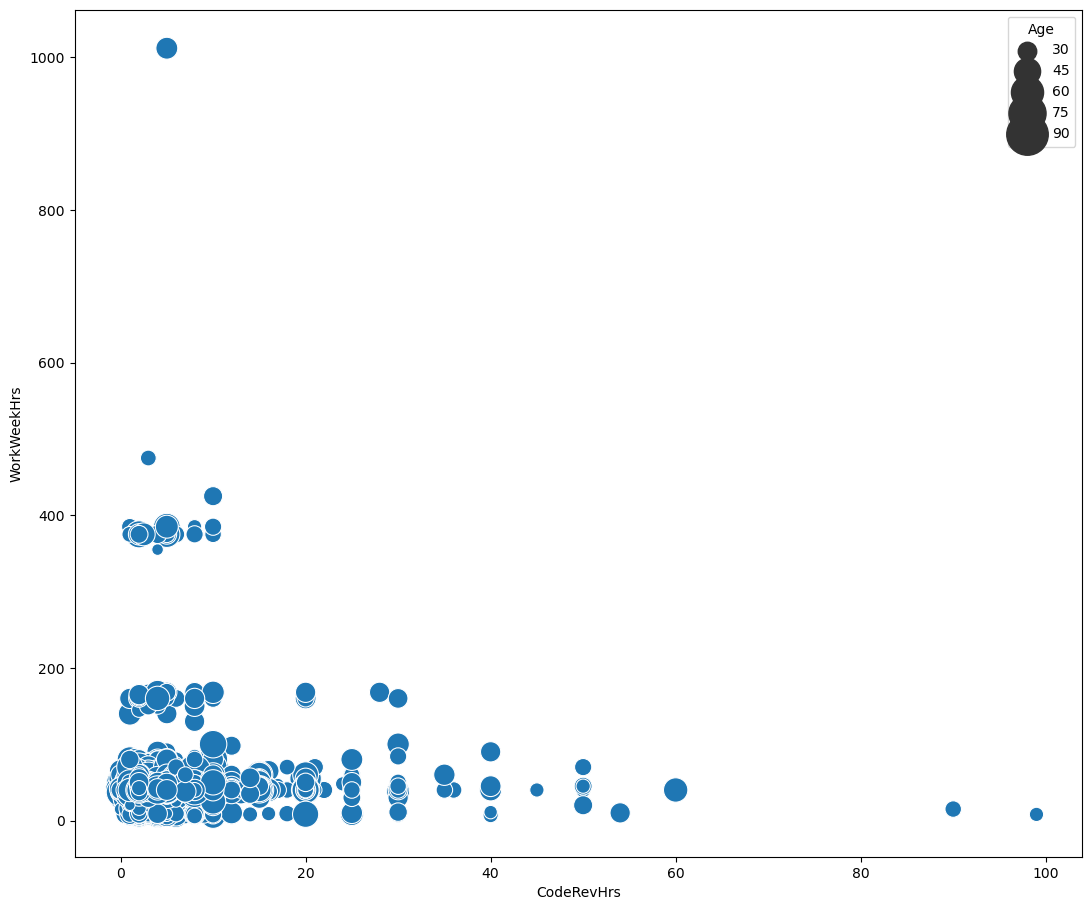

In [47]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master

"""

df = pd.read_sql_query(QUERY,conn)

print(df)

plt.figure(figsize=(13,11))

sns.scatterplot(data=df, x="CodeRevHrs", y="WorkWeekHrs", size="Age", legend=True, sizes=(10, 1000))

plt.show()



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [48]:
QUERY = """
SELECT *
FROM sqlite_master

"""
df = pd.read_sql_query(QUERY,conn)
df


,type,name,tbl_name,rootpage,sql
0,table,EduOther,EduOther,2,"CREATE TABLE ""EduOther"" (\n""Respondent"" INTEGE..."
1,table,DevType,DevType,741,"CREATE TABLE ""DevType"" (\n""Respondent"" INTEGER..."
2,table,LastInt,LastInt,1024,"CREATE TABLE ""LastInt"" (\n""Respondent"" INTEGER..."
3,table,JobFactors,JobFactors,1355,"CREATE TABLE ""JobFactors"" (\n""Respondent"" INTE..."
4,table,WorkPlan,WorkPlan,1808,"CREATE TABLE ""WorkPlan"" (\n""Respondent"" INTEGE..."
5,table,WorkChallenge,WorkChallenge,2088,"CREATE TABLE ""WorkChallenge"" (\n""Respondent"" I..."
6,table,LanguageWorkedWith,LanguageWorkedWith,2378,"CREATE TABLE ""LanguageWorkedWith"" (\n""Responde..."
7,table,LanguageDesireNextYear,LanguageDesireNextYear,2638,"CREATE TABLE ""LanguageDesireNextYear"" (\n""Resp..."
8,table,DatabaseWorkedWith,DatabaseWorkedWith,2877,"CREATE TABLE ""DatabaseWorkedWith"" (\n""Responde..."
9,table,DatabaseDesireNextYear,DatabaseDesireNextYear,3028,"CREATE TABLE ""DatabaseDesireNextYear"" (\n""Resp..."


   Respondent DatabaseDesireNextYear  COUNT
0           9             PostgreSQL   4328
1          16                MongoDB   3649
2           9                  Redis   3331
3           4                  MySQL   3281
4          16          Elasticsearch   2856


<Figure size 1000x600 with 0 Axes>

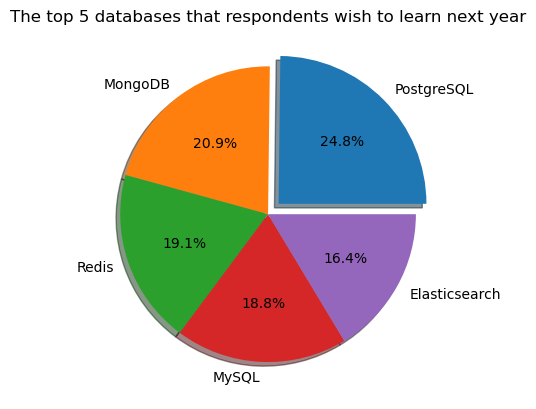

In [68]:
QUERY = """
SELECT *, COUNT(*) AS COUNT
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
LIMIT 5
"""

df = pd.read_sql_query(QUERY,conn)

print(df)

data = df['COUNT']
labels = df['DatabaseDesireNextYear']

plt.figure(figsize=(10,6))

fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%', explode = (0.1, 0, 0, 0, 0), shadow = True)
ax.set_title('The top 5 databases that respondents wish to learn next year')

plt.show()



   Respondent LanguageDesireNextYear  COUNT
0           4             JavaScript   6630
1           9               HTML/CSS   5328
2          20                 Python   5239
3           4                    SQL   5012
4           9             TypeScript   4088


<Figure size 1000x600 with 0 Axes>

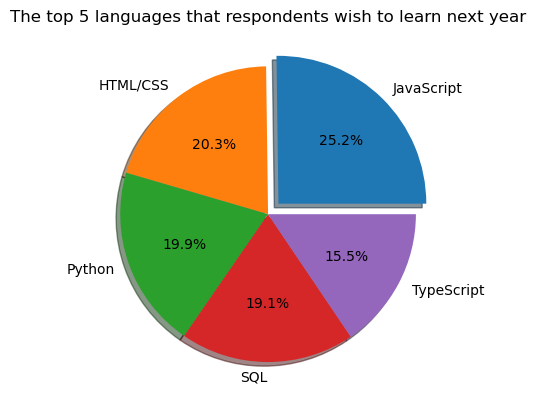

In [79]:
QUERY = """
SELECT *, COUNT(*) AS COUNT
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY count DESC
LIMIT 5
"""

df = pd.read_sql_query(QUERY,conn)

print(df)

data = df['COUNT']
labels = df['LanguageDesireNextYear']

plt.figure(figsize=(10,6))

fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%', explode = (0.1, 0, 0, 0, 0), shadow = True)
ax.set_title('The top 5 languages that respondents wish to learn next year')

plt.show()



   Respondent     LanguageWorkedWith  COUNT
0           9             JavaScript   8687
1           9               HTML/CSS   7830
2           4                    SQL   7106
3           9  Bash/Shell/PowerShell   4642
4           4                 Python   4542


<Figure size 1000x600 with 0 Axes>

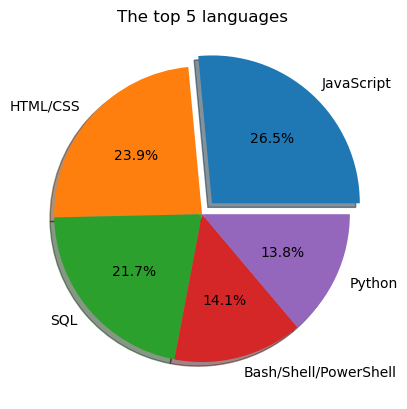

In [80]:
QUERY = """
SELECT *, COUNT(*) AS COUNT
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY count DESC
LIMIT 5
"""

df = pd.read_sql_query(QUERY,conn)

print(df)

data = df['COUNT']
labels = df['LanguageWorkedWith']

plt.figure(figsize=(10,6))

fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct='%1.1f%%', explode = (0.1, 0, 0, 0, 0), shadow = True)
ax.set_title('The top 5 languages')

plt.show()



In [119]:
QUERY = """
SELECT * 
FROM DatabaseWorkedWith
ORDER BY Respondent
"""
df = pd.read_sql_query(QUERY,conn)

resp_sum = df.groupby('Respondent').sum()
resp_sum[resp_sum['DatabaseWorkedWith']=='MySQL'].count()

DatabaseWorkedWith    474
dtype: int64

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


       Age  WorkWeekHrs  CodeRevHrs
0     31.0          8.0         3.0
1     34.0         40.0         2.0
2     32.0         40.0         2.0
3     34.0         42.0        15.0
4     33.0         40.0         2.0
...    ...          ...         ...
2937  32.0         42.0         4.0
2938  32.0         50.0         2.0
2939  32.0         56.0        14.0
2940  34.0         40.0         5.0
2941  30.0         80.0         1.0

[2942 rows x 3 columns]


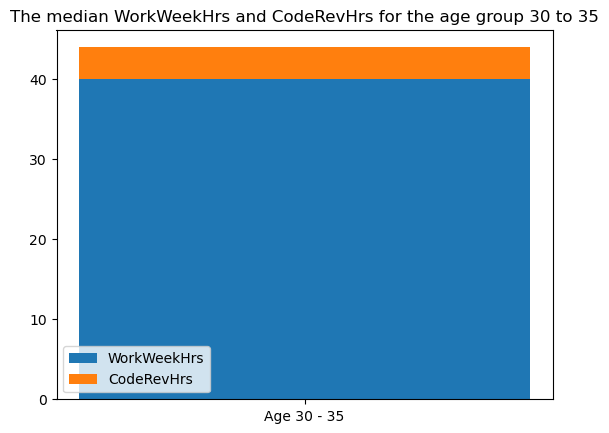

In [67]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 and 35
"""

df = pd.read_sql_query(QUERY,conn)

print(df)

Work_wk_hrs = df['WorkWeekHrs'].quantile(0.5)
Code_rev_hrs = df['CodeRevHrs'].quantile(0.5)

fig, ax = plt.subplots()

ax.bar('Age 30 - 35', Work_wk_hrs, label='WorkWeekHrs')
ax.bar('Age 30 - 35', Code_rev_hrs, bottom=Work_wk_hrs, label='CodeRevHrs')

ax.set_title('The median WorkWeekHrs and CodeRevHrs for the age group 30 to 35')
ax.legend()


plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


      Age  ConvertedComp
0    47.0       103000.0
1    54.0            NaN
2    47.0        54996.0
3    47.0        62807.0
4    45.0        72522.0
..    ...            ...
594  45.0        76339.0
595  46.0        68705.0
596  48.0       300000.0
597  50.0        87668.0
598  50.0        59652.0

[599 rows x 2 columns]


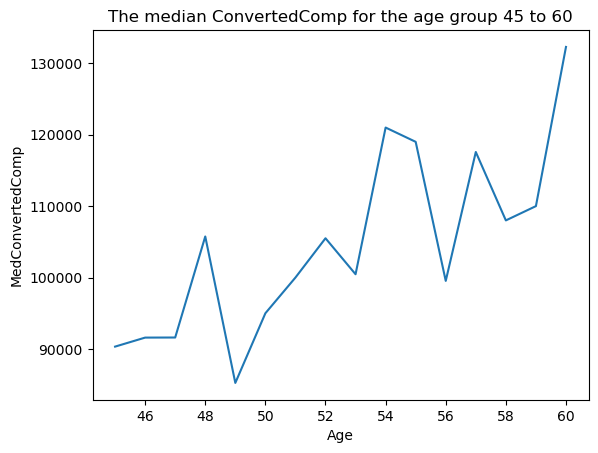

In [72]:
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 and 60
"""

df = pd.read_sql_query(QUERY,conn)

print(df)

medians = df.groupby('Age')['ConvertedComp'].median()

data = pd.DataFrame(list(zip(medians.index, medians.values)),
               columns =['Age', 'MedConvertedComp'])

fig, ax = plt.subplots()

sns.lineplot(data=data, x='Age', y = 'MedConvertedComp')
ax.set_title('The median ConvertedComp for the age group 45 to 60')


plt.show()




### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


                                          MainBranch  Count
0                     I am a developer by profession  10618
1  I am not primarily a developer, but I write co...    780


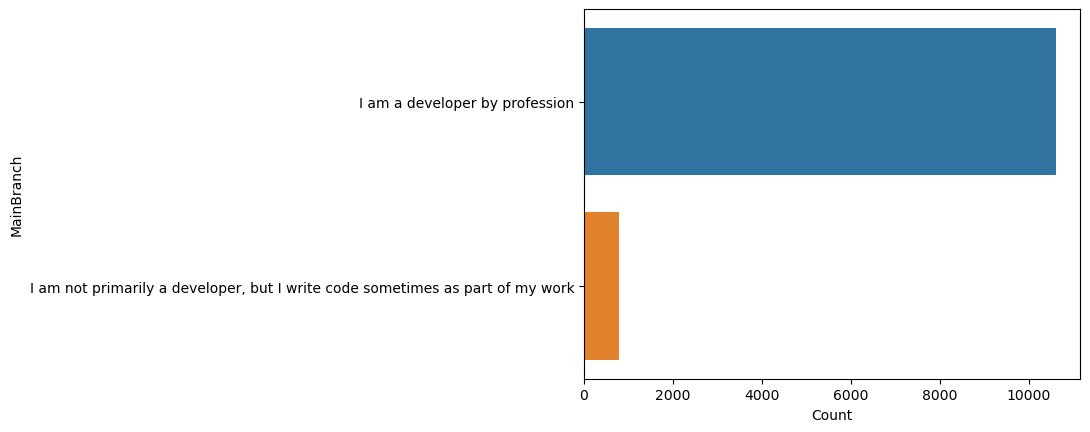

In [78]:
QUERY = """
SELECT MainBranch, COUNT(*) AS Count
FROM master
GROUP BY MainBranch
"""

df = pd.read_sql_query(QUERY,conn)

print(df)

fig, ax = plt.subplots()

sns.barplot(data=df, x='Count', y='MainBranch', orient='h')

plt.show()


In [98]:
QUERY = """
SELECT DevType, COUNT(*) AS Count
FROM DevType
GROUP BY DevType
ORDER BY count DESC
"""

df = pd.read_sql_query(QUERY,conn)
print(df)

                                          DevType  Count
0                           Developer, full-stack   6928
1                             Developer, back-end   6290
2                            Developer, front-end   3920
3   Developer, desktop or enterprise applications   2575
4                               Developer, mobile   1959
5                               DevOps specialist   1639
6                          Database administrator   1413
7                            System administrator   1202
8                                        Designer    988
9                           Developer, QA or test    911
10    Developer, embedded applications or devices    854
11                                 Engineer, data    832
12  Data scientist or machine learning specialist    803
13                       Data or business analyst    802
14                                        Student    766
15                            Academic researcher    556
16                             

       Age  ConvertedComp
0     28.0        90000.0
1     26.0       455352.0
2     29.0        65277.0
3     27.0        20623.0
4     27.0       107000.0
...    ...            ...
4312  26.0        35518.0
4313  26.0        26586.0
4314  25.0        19880.0
4315  25.0        80371.0
4316  30.0            NaN

[4317 rows x 2 columns]


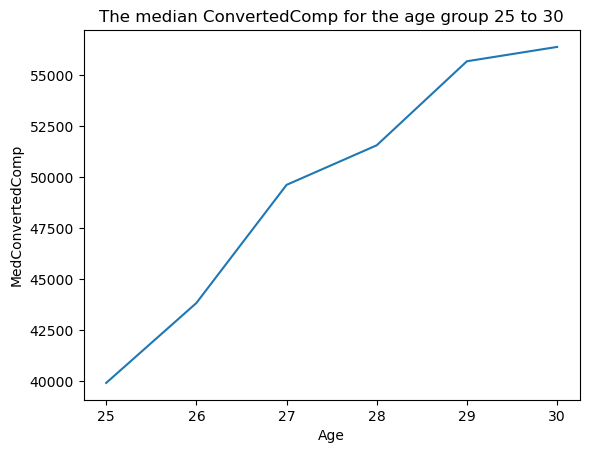

In [99]:
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 25 and 30
"""

df = pd.read_sql_query(QUERY,conn)

print(df)

medians = df.groupby('Age')['ConvertedComp'].median()

data = pd.DataFrame(list(zip(medians.index, medians.values)),
               columns =['Age', 'MedConvertedComp'])

fig, ax = plt.subplots()

sns.lineplot(data=data, x='Age', y = 'MedConvertedComp')
ax.set_title('The median ConvertedComp for the age group 25 to 30')


plt.show()

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
